<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_2_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this demonstration set up and ready to use.


# Demonstration 2.3.3 Predicting with regression

Follow the demonstration to learn how to perform linear regression using statistical methods in Python. In this video, you will:
- Learn the difference between simple and multiple linear regression.
- Learn how to find the coefficients of simple linear regression and multiple linear regression, using the analytical (closed form) solution approach.


### a) Simple linear regression is given as:
$y=β_0+β_1x+ε$

where:
- $y$ is the dependent variable (response).
- $x$ is the independent variable (predictor).
- $β_0$ is the y-intercept.
- $β_1$ is the slope.
- $ε$ is the error term.

The slope $β_1$ (or m) is calculated as:

$m = \frac {\sum (x- \bar{x}) (y-\bar{y})} {\sum (x-\bar{x})^2}$


The intercept $β_0$ (or *b*) is caclulated as:

$b = \bar{y} - m ⋅ \bar{x}$

In [ ]:
# Import the required libraries.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [ ]:
# Create a data set.
x = np.array([1, 2, 3, 4, 5,
              6, 7, 8, 9, 10])

y = np.array([2, 3, 4, 5, 6,
              7, 8, 9, 10, 11])

# Define a moderate variation epsilon error magnitude.
epsilon = 0.5

# Generate some random noise (epsilon).
error = np.random.normal(0, epsilon, size=len(y))

# Add the error to y
y = y + error


In [ ]:
# Calculate the mean of x and y.
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x)

5.5


In [ ]:
# Calculate the slope and y-intercept
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x)**2)

slope = numerator / denominator

intercept = mean_y - slope * mean_x

In [ ]:
# Predict y values using the linear regression equation.
predicted_y = slope * x + intercept

# View output.
predicted_y

array([ 1.70572495,  2.68326849,  3.66081203,  4.63835557,  5.61589911,
        6.59344265,  7.57098619,  8.54852974,  9.52607328, 10.50361682])

In [ ]:
# Calculate R-squared to test accuracy.
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - predicted_y)**2)
r_squared = 1 - (ss_residual / ss_total)

In [ ]:
# Display coefficients and R-squared.
print("Slope (x):", slope)
print("Intercept:", intercept)
print("R-squared:", r_squared)

Slope (x): 0.9775435413667461
Intercept: 0.7281814051916902
R-squared: 0.984489493383986


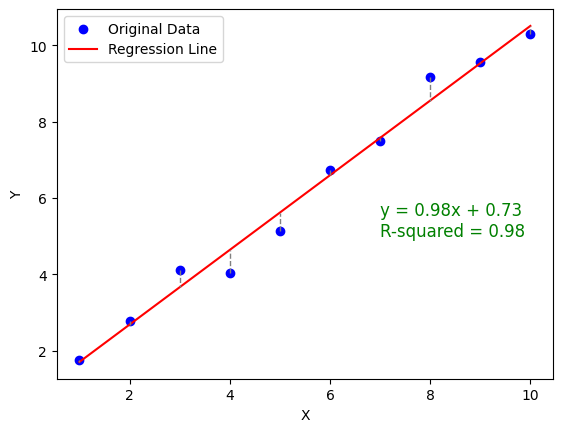

In [ ]:
# Plot the original data points.
plt.scatter(x, y,
            color='blue',
            label='Original Data')

# Plot    the regression line.
plt.plot(x, predicted_y,
         color='red',
         label='Regression Line')

# Add dashed lines for errors.
for i in range(len(x)):
    # Draw a dashed line from each data point to the corresponding point on the regression line
    plt.plot([x[i], x[i]], [y[i], predicted_y[i]], color='gray', linestyle='--', linewidth=1)

# Annotate the equation of the line and R-squared.
equation = f'y = {slope:.2f}x + {intercept:.2f}\nR-squared = {r_squared:.2f}'
plt.annotate(equation,
             xy=(7, 5),
             fontsize=12,
             color='green')

# Add labels and a legend.
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# View the plot.
plt.show()

In [ ]:
# Create a matrix X with the independent variables. The ones represent the intercept.
X = np.column_stack((x,np.ones_like(x)))
# Calculate the coefficients using the normal equation.
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients for each independent variable and the intercept.
slope_x, intercept = coefficients

# Calculate predicted y values.
pred_y = slope_x * x + intercept

# View the output.
pred_y

array([ 1.70572495,  2.68326849,  3.66081203,  4.63835557,  5.61589911,
        6.59344265,  7.57098619,  8.54852974,  9.52607328, 10.50361682])

In [ ]:
# Calculate R-squared.
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - pred_y)**2)
r_squared2 = 1 - (ss_residual / ss_total)

# Display coefficients and R-squared.
print("Slope (x):", slope_x)
print("Intercept:", intercept)
print("R-squared:", r_squared2)

Slope (x): 0.9775435413667463
Intercept: 0.7281814051916888
R-squared: 0.984489493383986


### b) Multiple linear regression is given as:
$y=β_0+β_1x_1+β_2x_2+ \dots + β_nx_n +ε$

where:
- $y$ is the dependent variable (response).
- $x_1, x_2, ..., x_n$ is the independent variable (predictor).
- $β_0$ is the y-intercept.
- $β_1, β_2,...,β_n$ is the slope.
- $ε$ is the error term.

In the more general case of multiple linear regression, comprising of any number of input variables, we can use the Normal equation method to find the intercept and the respective slopes.

The normal equation is a closed-form solution. It is as an analytical approach to find the coefficients ($β_0, β_1, β_2,...,β_n$) that minimize the loss function. We will be covering loss functions extensively in Course 2.

The Normal equation provides a way to calculate the line of best fit using the equation:

$\theta = (X^TX)^{-1}X^Ty$

Where:

$X$ is the matrix of input features

$y$ is the vector of output values

and the solution $\theta$ comprises of the slopes and the intercept

$\theta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n \end{bmatrix}$

In [ ]:
# Create a sample data set.
x1 = np.array([1.1, 2.3, 3.1, 4.5, 5.2,
               6.7, 7.2, 8.1, 9.4, 10])
x2 = np.array([2.6, 3.4, 5.1, 7.2, 11,
               13.2, 17.1, 19.6, 23.1, 29.4])
y = np.array([2, 3, 4, 5, 6,
              7, 8, 9, 10, 11])

# Create a matrix X with the independent variables. The ones represent the intercept.
X = np.column_stack((x1,
                     x2,
                     np.ones_like(x1)))

In [ ]:
# Calculate the coefficients using the normal equation.
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients for each independent variable and the intercept.
slope_x1, slope_x2, intercept = coefficients

In [ ]:
# Calculate predicted y values.
pred_y = slope_x1 * x1 + slope_x2 * x2 + intercept

# View the output.
pred_y

array([ 2.09321528,  3.06796107,  3.81494776,  5.04930735,  5.89549813,
        7.21386242,  7.9170268 ,  8.80631191, 10.08158187, 11.06028741])

In [ ]:
# Calculate R-squared.
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - pred_y)**2)
r_squared2 = 1 - (ss_residual / ss_total)

# Display coefficients and R-squared.
print("Slope (x1):", slope_x1)
print("Slope (x2):", slope_x2)
print("Intercept:", intercept)
print("R-squared:", r_squared2)

Slope (x1): 0.7567703410951618
Slope (x2): 0.08327671992433883
Intercept: 1.044248433888232
R-squared: 0.9980444736937332


# Key information
The demonstrations illustrated how to find the coefficients for a simple linear regression (one independent and one dependent variable), and a multiple linear regression (two or more independent variables and one dependent variable).

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.